# Read processed dataset

In [13]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ajmal/network_anomaly_using_hybrid_ml/df_cleaned.csv')
df.head()

,switch,pktcount,bytecount,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,1,45304,48294064,1.010000e+11,3,1943,13535,14428310,451,0,UDP,143928631,3917,0,0.0,0.0,0
1,1,126395,134737070,2.810000e+11,2,1943,13531,14424046,451,0,UDP,3842,3520,0,0.0,0.0,0
2,1,90333,96294978,2.010000e+11,3,1943,13534,14427244,451,0,UDP,3795,1242,0,0.0,0.0,0
3,1,90333,96294978,2.010000e+11,3,1943,13534,14427244,451,0,UDP,3688,1492,0,0.0,0.0,0
4,1,90333,96294978,2.010000e+11,3,1943,13534,14427244,451,0,UDP,3413,3665,0,0.0,0.0,0


# 2. Exploratory Data Analysis
## ydata-profiling is a library which used to do EDA

In [ ]:
!pip install -q ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.6 MB/s eta 0:00:00


In [ ]:
import ydata_profiling

# Create a profile report
profile = ydata_profiling.ProfileReport(df)

# Display the report in a Jupyter notebook
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Save the report to a path on Drive
profile.to_file("/content/drive/MyDrive/ajmal/network_anomaly_using_hybrid_ml/EDA_of_network_anomaly.html")


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- From correlation matrix Pairflow and Protocol features are 87% correlated.
- As well as byteperflow, pktperflow and pktrate are above 87% correlated.

### Dropping additional features beacuase of high correlation.

In [14]:
# drop Protocol,  pktperflow and pktrate from df

df.drop(['Protocol', 'pktperflow', 'pktrate'], axis=1, inplace=True)
df.head()


,switch,pktcount,bytecount,tot_dur,flows,packetins,byteperflow,Pairflow,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,1,45304,48294064,1.010000e+11,3,1943,14428310,0,143928631,3917,0,0.0,0.0,0
1,1,126395,134737070,2.810000e+11,2,1943,14424046,0,3842,3520,0,0.0,0.0,0
2,1,90333,96294978,2.010000e+11,3,1943,14427244,0,3795,1242,0,0.0,0.0,0
3,1,90333,96294978,2.010000e+11,3,1943,14427244,0,3688,1492,0,0.0,0.0,0
4,1,90333,96294978,2.010000e+11,3,1943,14427244,0,3413,3665,0,0.0,0.0,0


## After dropping highly correlated fetures, plot the Correlation matrix

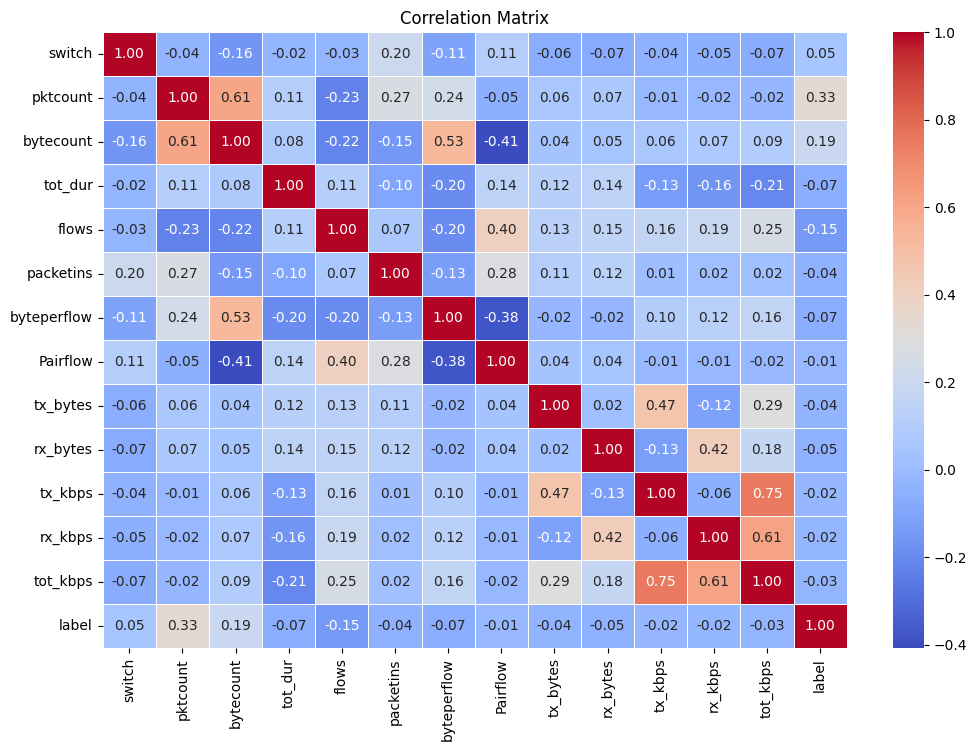

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


- All features are below 75% correlated

## checking for outliers

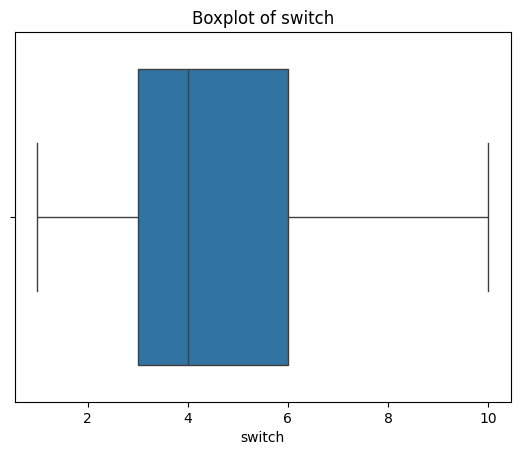

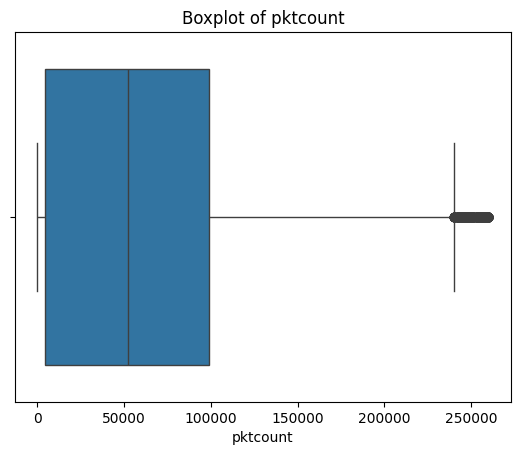

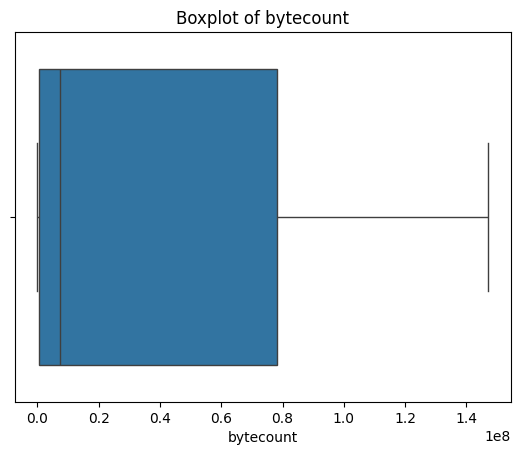

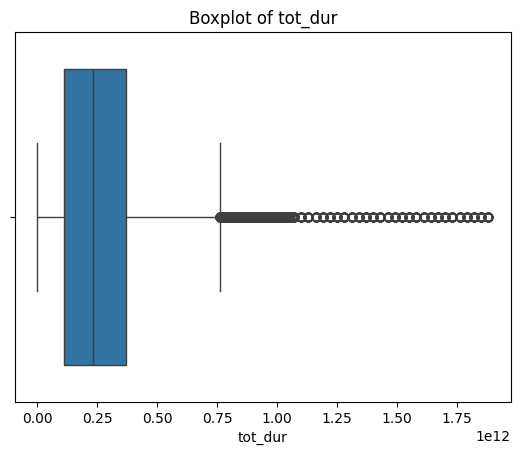

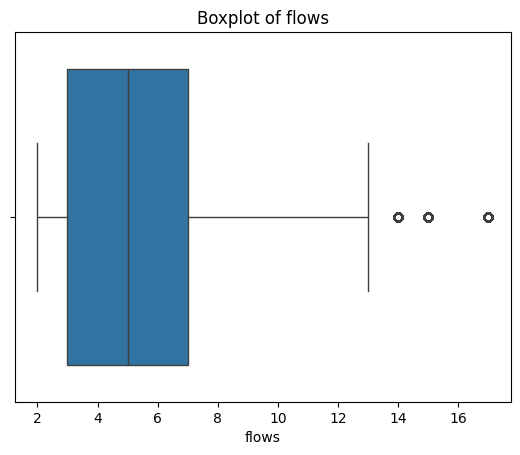

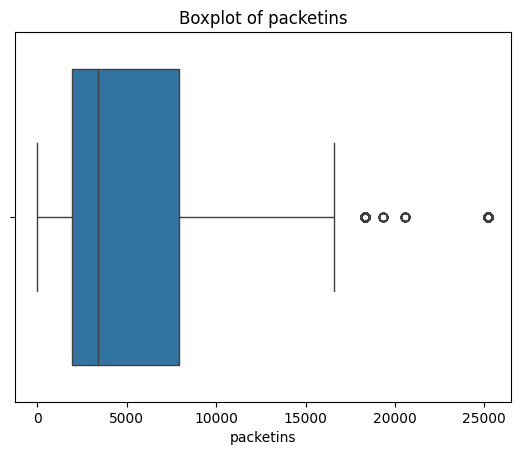

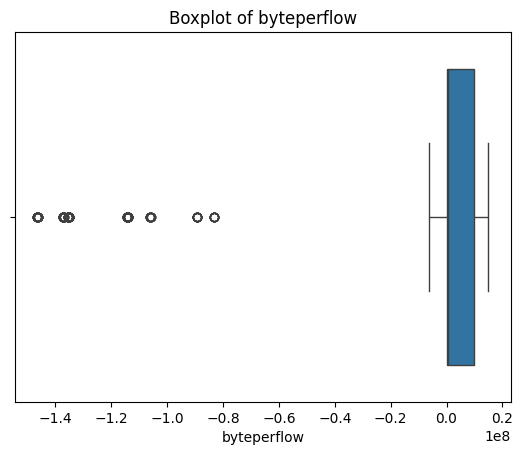

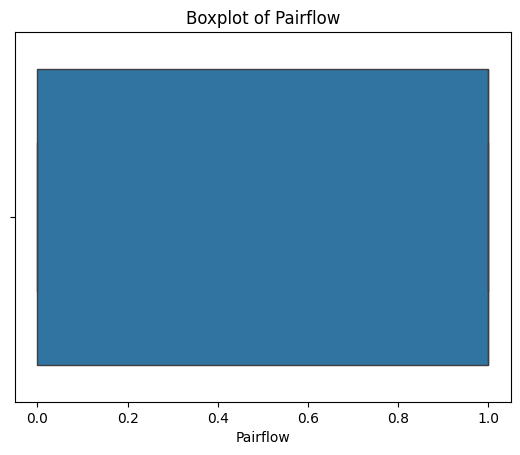

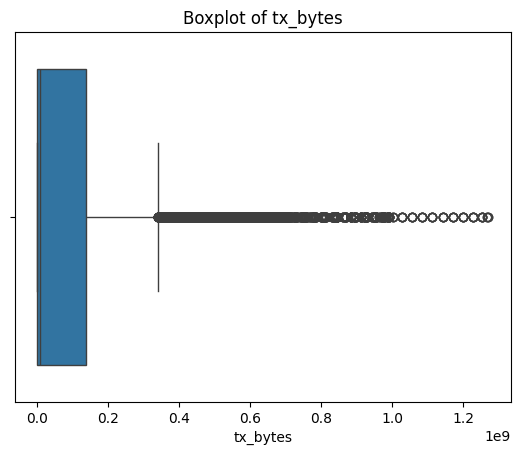

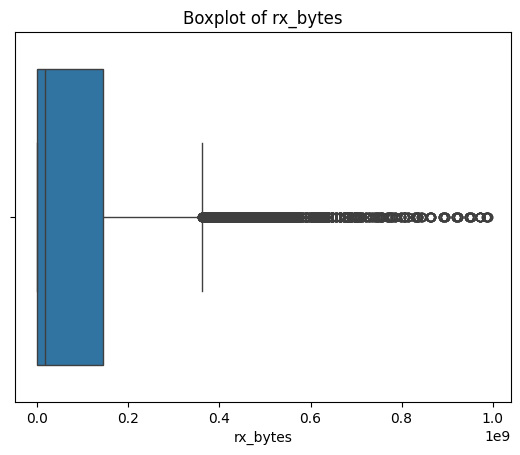

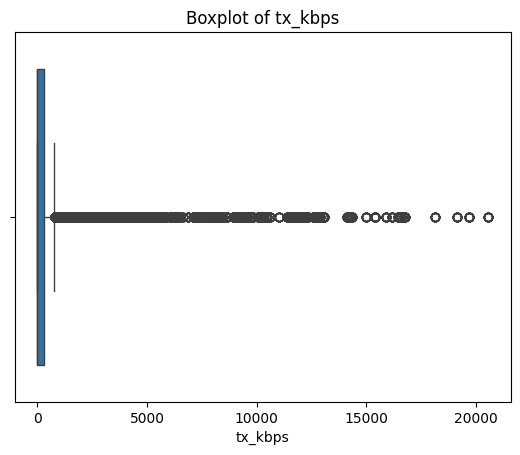

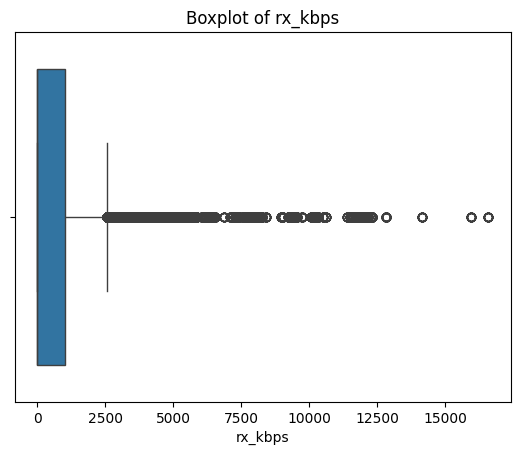

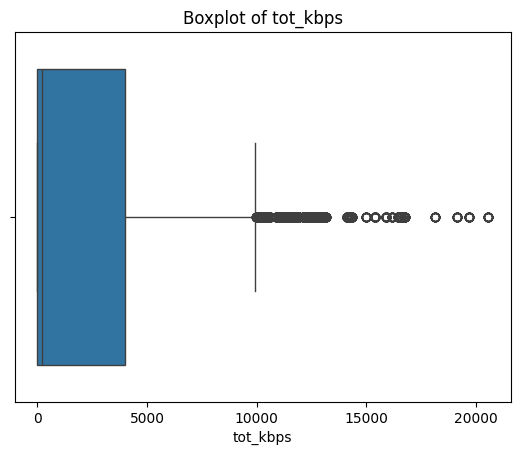

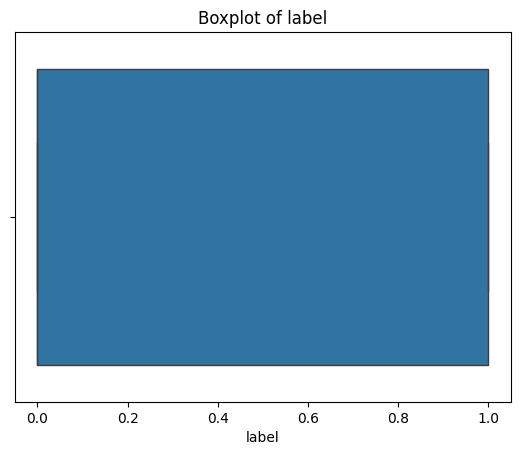

In [8]:
# check outliers in each features

import seaborn as sns

# Create a boxplot for each feature
for column in df.columns:
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


In [17]:
import numpy as np

# Calculate the IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("Number of outliers in each feature:\n", outliers)


Number of outliers in each feature:
 switch             0
pktcount         541
bytecount          0
tot_dur         5545
flows            665
packetins       5168
byteperflow      139
Pairflow           0
tx_bytes        6703
rx_bytes        4250
tx_kbps        17141
rx_kbps        15182
tot_kbps        3726
label              0
dtype: int64


In [16]:
# Calculate the IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify and remove outliers
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Data shape after removing outliers:", df_no_outliers.shape)


Data shape after removing outliers: (40220, 14)


In [28]:
df_no_outliers.to_csv('/content/drive/MyDrive/ajmal/network_anomaly_using_hybrid_ml/df_processed_final.csv', index=False)